In [1]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("all_stocks_5yr.csv")
df.columns = df.columns.str.strip()
df['date'] = pd.to_datetime(df['date'])

df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


<Axes: title={'center': 'Average Stock Close Over Time'}, xlabel='Year', ylabel='Close Price (USD)'>

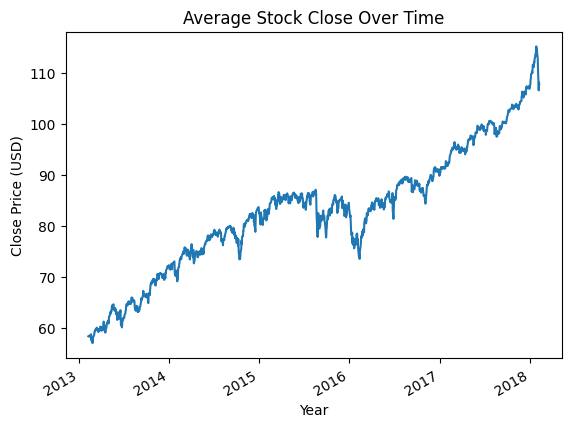

In [26]:
average_close = df.groupby('date')['close'].mean()
average_close.plot(kind='line', title='Average Stock Close Over Time', xlabel='Year', ylabel='Close Price (USD)')

<Axes: title={'center': 'Change in Average Stock Price Each Day'}, xlabel='Year', ylabel='Change in Stock Price (%)'>

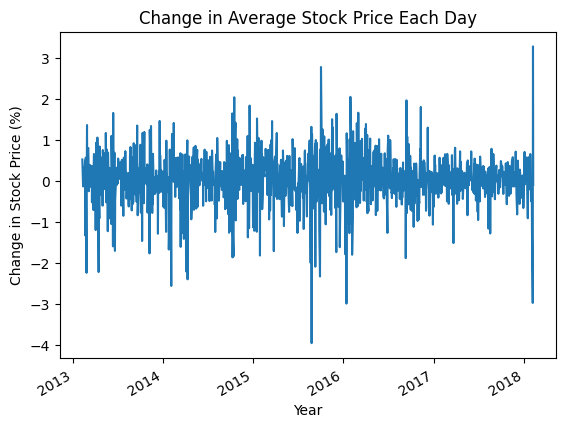

In [25]:
average_open = df.groupby('date')['open'].mean()
average_change = average_close.divide(average_open)
average_change = average_change.subtract(1)
average_change = average_change.multiply(100)

average_change.plot(kind='line', title='Change in Average Stock Price Each Day', xlabel='Year', ylabel='Change in Stock Price (%)')

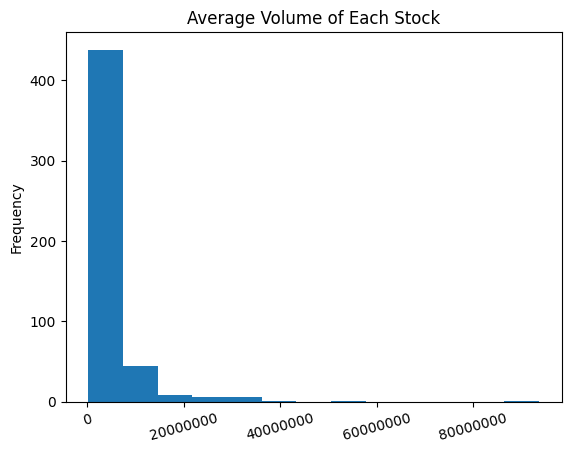

In [24]:
average_stock = df.groupby('Name')['volume'].mean()
plt.rcParams["axes.formatter.limits"] = (-10, 10)
hist = average_stock.plot(kind='hist', title='Average Volume of Each Stock', bins=13, rot=15)
